# Overview
We found 4 datasets on kaggle about different aspects related to the MBTI test:
1. How the MBTI types are distributed around the world: [MBTI-TYPES Data](https://www.kaggle.com/datasets/yamaerenay/mbtitypes-full)
2. Posts by people of different MBTI types: [(MBTI) Myers-Briggs Personality Type Dataset](https://www.kaggle.com/datasets/datasnaek/mbti-type)
3. MBTI types of movie charaters: [Movie Character MBTI Dataset](https://www.kaggle.com/datasets/subinium/movie-character-mbti-dataset)
4. MBTI types and birthdays: [MBTI and Birthdays](https://www.kaggle.com/datasets/dakotagravitt/mbti-and-birthdays)

First, we plan to perform an analysis on these datasets to see if they can be used for visualization.

In [1]:
import pandas as pd
import plotly.express as px

# Distribution dataset
This dataset contains 2 files:

1. countries.csv: compares distribution of MBTI-Types in 158 countries
2. types.csv: contains following information:
    - Type: type (as index)
    - Description: a to-the-point description of type
    - Nickname: nickname associated with personality
    - Definition: a formal definition of type
    - Celebrities: celebrities of that type
    - E/I/T/F/S/N/J/P: abbreviation of features like "extroverted", "sensing", "judgmental" etc.
    - and other features like strengths and weaknesses, romantic relationships…
    
We are only interested in the first one.

In [2]:
distribution_df = pd.read_csv('distribution/countries.csv')
distribution_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  158 non-null    object 
 1   ESTJ-A   158 non-null    float64
 2   ESFJ-A   158 non-null    float64
 3   INFP-T   158 non-null    float64
 4   ESFJ-T   158 non-null    float64
 5   ENFP-T   158 non-null    float64
 6   ENFP-A   158 non-null    float64
 7   ESTJ-T   158 non-null    float64
 8   ISFJ-T   158 non-null    float64
 9   ENFJ-A   158 non-null    float64
 10  ESTP-A   158 non-null    float64
 11  ISTJ-A   158 non-null    float64
 12  INTP-T   158 non-null    float64
 13  INFJ-T   158 non-null    float64
 14  ISFP-T   158 non-null    float64
 15  ENTJ-A   158 non-null    float64
 16  ESTP-T   158 non-null    float64
 17  ISTJ-T   158 non-null    float64
 18  ESFP-T   158 non-null    float64
 19  ENTP-A   158 non-null    float64
 20  ESFP-A   158 non-null    float64
 21  INTJ-T   158 non

The figure below shows the most common personality type in each country

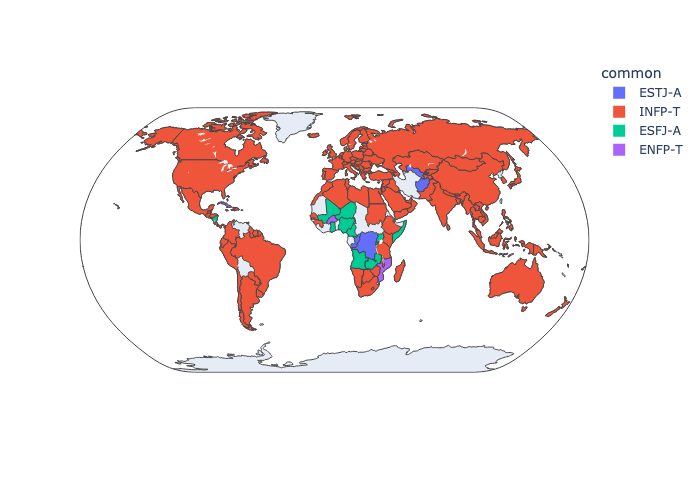

In [3]:
distribution_df_common = distribution_df.set_index('Country')
distribution_df_common['common'] = distribution_df_common.idxmax(axis="columns")
distribution_df_common = distribution_df_common.reset_index(level=0)

fig = px.choropleth(distribution_df_common, locations="Country", color="common", locationmode="country names", projection='natural earth')
# fig.show()
fig.show('png')  # to display on github

The figure below shows the proportion of each MBTI type in each country

(If the plot is not rendering correctly, please remove 'png', or $ pip install -U kaleido)

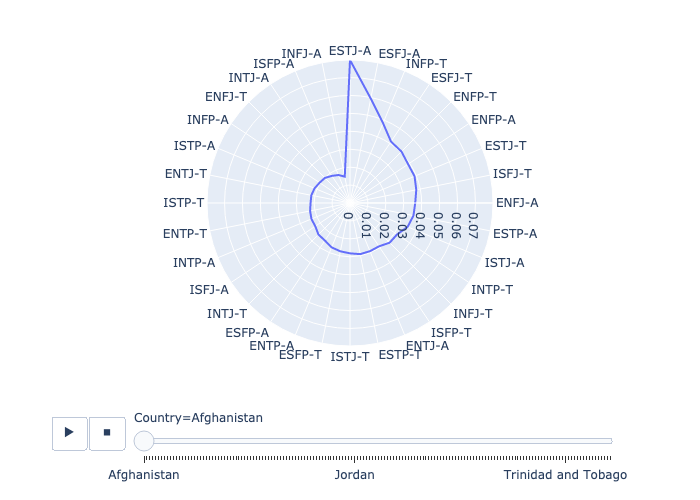

In [4]:
distribution_df_melt = distribution_df.melt(id_vars=['Country'])

fig = px.line_polar(distribution_df_melt, r="value", theta="variable", line_close=True, animation_frame='Country')
# fig.show()        # interactive
fig.show('png')     # to display on github

# Post dataset

This dataset contains over 8600 rows of data.
Each row is a person’s:
1. Type (This persons 4 letter MBTI code/type)
2. A section of each of the last 50 things they have posted (Each entry separated by "|||" (3 pipe characters))

In [5]:
post = pd.read_csv('post/mbti_1.csv')
post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


1. The column `post` contains the last 50 things they have posted (eparated by "|||"). 
2. For further visualization and statistical processing, we need to split this column into several columns(each column contains exactly one post).
3. Note that some of the posts contains only a url link.

In [6]:
# Split the column `post` into 50 columns
post_idx = []
for i in range(50):
    post_idx.append('post'+str(i))
df = post
df = df.drop(df[df['posts'].str.contains('\|\|\|\|')].index)
df[post_idx] = df['posts'].str.split(pat='\|\|\|',expand=True).drop([1235]).drop(columns=[50])
df = df[["type"] + post_idx]
# df.to_csv('data/post/split.csv') 

In [7]:
# Statistics
avg_char = []
avg_word = []
url_num = []
idx = list(df.index)
for i in range(8675):
    if i not in idx:
        avg_word.append(0)
        avg_char.append(0)
        url_num.append(0)
        continue
    char_num = 0
    word_num = 0
    post = 0
    url = 0
    for j in range(50):
        if(df['post'+str(j)][i] != None):
            if('http' in str(df['post'+str(j)][i])):
                url += 1
            else:
                char_num += len(str(df['post'+str(j)][i]))
                word_num += len(str(df['post'+str(j)][i]).split())
                post += 1
    if(char_num ==0 and post == 0 ):
        avg_char.append(0)
        avg_word.append(0)
    else:
        avg_char.append(char_num / post)
        avg_word.append(word_num / post)
    url_num.append(url)
df['avg_char'] =  pd.DataFrame(avg_char)
df['avg_word'] =  pd.DataFrame(avg_word)
df['url_num'] =  pd.DataFrame(url_num)
df = df[["type"] + ['avg_char'] + ['avg_word'] +['url_num'] + post_idx]
# df.to_csv('data/post/split_statistics.csv') 
# df.info()

In [8]:
# More statistics
import numpy as np
type = list(df['type'])
avg = list(df['avg_char'])
url = list(df['url_num'])
word = list(df['avg_word'])

types = ['ESTJ','ESTP','ESFJ','ESFP','ENTJ','ENTP','ENFJ','ENFP','ISTJ','ISTP','ISFJ','ISFP','INTJ','INTP','INFJ','INFP']
avgs = list(np.zeros(16))
words = list(np.zeros(16))
urls = list(np.zeros(16))
count = list(np.zeros(16))
for i in range(8531):
    if type[i] in types:
        idx = types.index(type[i])
        count[idx] += 1
        avgs[idx] += avg[i]
        words[idx] += word[i]
        urls[idx] += url[i]

for i in range(len(types)):
    avgs[i] /= count[i]
    words[i] /= count[i]
    urls[i] /= count[i]


dict = {'type':types,'characters per comment':avgs, 'words per comment':words, 'url per comment':urls}

df_new = pd.DataFrame(data = dict)
df_new.info()
# df_new.to_csv('data/post/16statistics.csv') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   type                    16 non-null     object 
 1   characters per comment  16 non-null     float64
 2   words per comment       16 non-null     float64
 3   url per comment         16 non-null     float64
dtypes: float64(3), object(1)
memory usage: 640.0+ bytes


The figure below shows `words per comment`. We found that generally speaking, personalities with "I"(Introversion) actually has more words per comment.

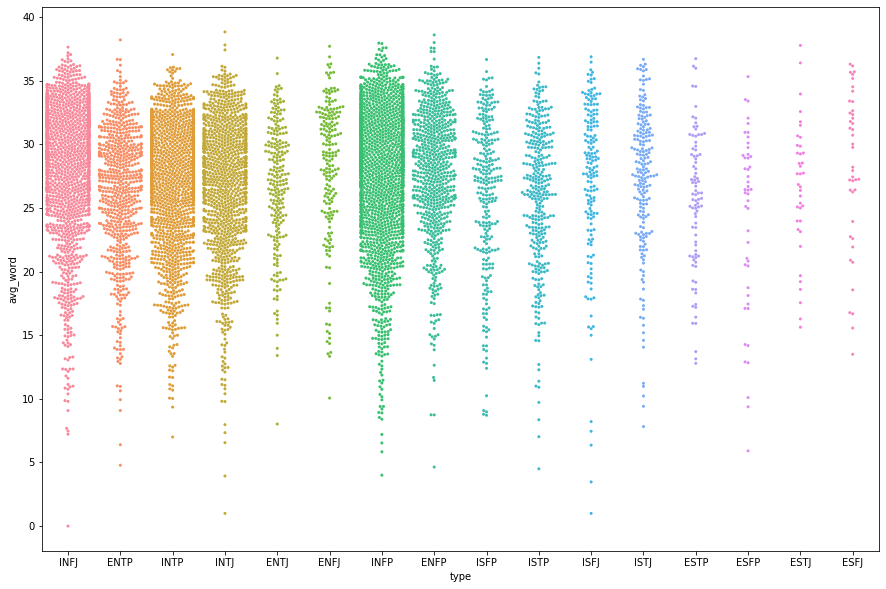

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
with warnings.catch_warnings(record=True):
    plt.figure(figsize=(15,10))
    sns.swarmplot("type", "avg_word", data=df,size=3)

The figure below shows `URLs per comment`. We found that generally speaking, personalities with "I"(Introversion) post more words per comment.

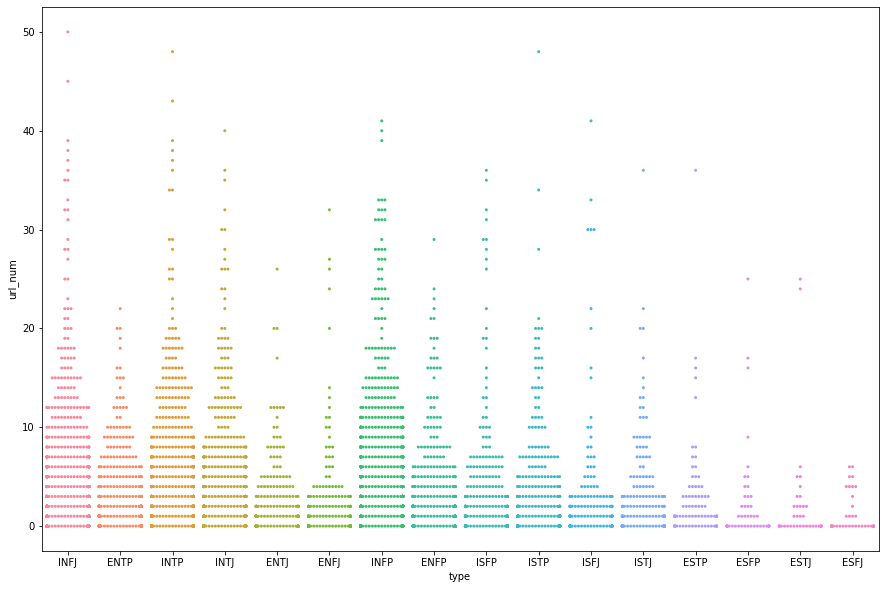

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
with warnings.catch_warnings(record=True):
    plt.figure(figsize=(15,10))
    sns.swarmplot("type", "url_num", data=df,size=3)

The figure below shows `average words and characters per comment` using histogram.

<Figure size 432x288 with 0 Axes>

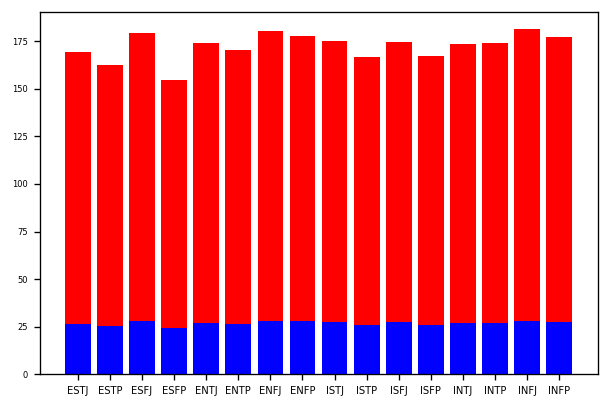

In [11]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(dpi=120)
plt.bar(range(len(types)), words, tick_label=types, color = 'b')
plt.bar(range(len(types)), avgs, bottom = words, tick_label=types, color = 'r')
plt.xticks(fontsize=6)
plt.yticks(fontsize=5)
plt.show()

The figure below shows `URLs per comment` using histogram.

<Figure size 432x288 with 0 Axes>

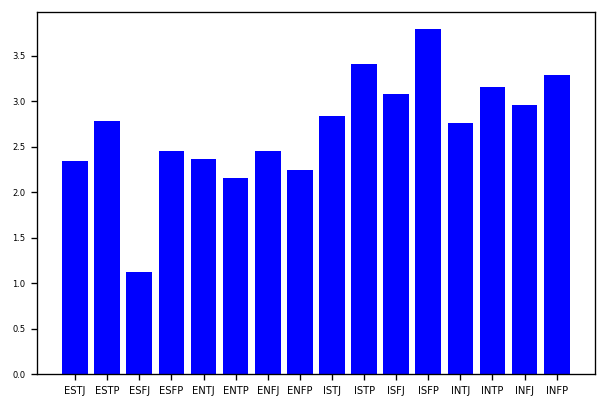

In [12]:
# average number of urls
plt.figure()
plt.figure(dpi=120)
plt.bar(range(len(types)), urls, tick_label=types, color = 'b')
plt.xticks(fontsize=6)
plt.yticks(fontsize=5)
plt.show()

# Movie dataset

In [13]:
movie_df = pd.read_csv('movie/mbti.csv')
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18741 entries, 0 to 18740
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   stat       18476 non-null  object
 1   mbti       18741 non-null  object
 2   enneagram  12066 non-null  object
 3   role       18741 non-null  object
 4   movie      18741 non-null  object
 5   img_url    18741 non-null  object
dtypes: object(6)
memory usage: 878.6+ KB


The figure below shows the characters in each MBTI type in Marvel movies  

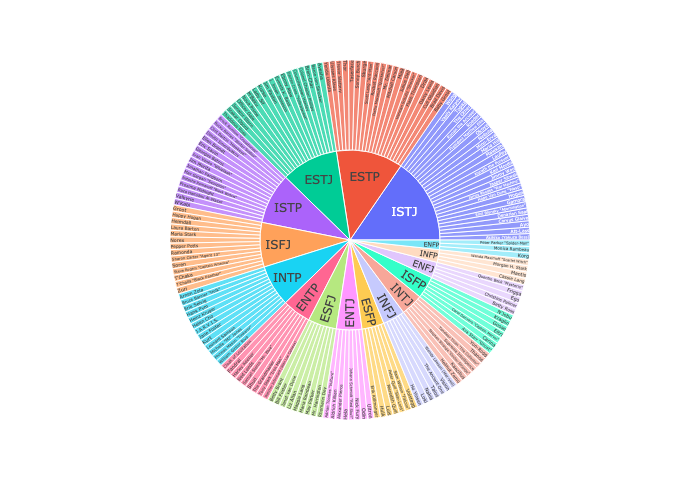

In [14]:
pd.set_option('mode.chained_assignment', None)
marvel_charaters = movie_df[movie_df['movie'].str.contains('Marvel')].drop_duplicates(subset=['role'])
marvel_charaters['value'] = 1
marvel_charaters = marvel_charaters[['mbti', 'role', 'value']]

fig = px.sunburst(marvel_charaters, path=['mbti', 'role'], values='value')
fig.show('png')

The figure below shows the characters in each MBTI type in Harry Potter

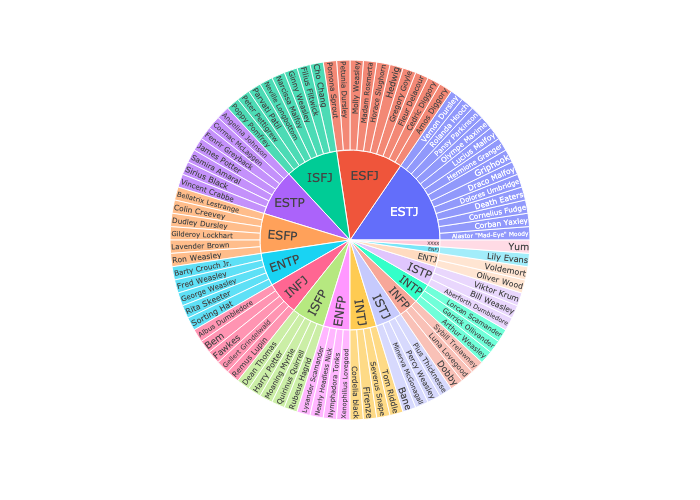

In [15]:
pd.set_option('mode.chained_assignment', None)
hp_charaters = movie_df[movie_df['movie'].str.contains('Harry Potter')].drop_duplicates(subset=['role'])
hp_charaters['value'] = 1
hp_charaters = hp_charaters[['mbti', 'role', 'value']]

fig = px.sunburst(hp_charaters, path=['mbti', 'role'], values='value')
fig.show('png')

# Birthday dataset

In [16]:
birthday_df = pd.read_csv('birthday/birthdays.csv')
birthday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Timestamp                     306 non-null    object
 1   Birthday                      306 non-null    object
 2   Time of Birth (not required)  159 non-null    object
 3   MBTI Type                     306 non-null    object
dtypes: object(4)
memory usage: 9.7+ KB


We are not interested in the time of birth, so we simply drop it.

In [17]:
birthday_df.drop(labels="Time of Birth (not required)",axis=1,inplace=True)
birthday_df.head()

,Timestamp,Birthday,MBTI Type
0,4/12/2020 17:39:37,9/13/1996,INFJ
1,4/12/2020 17:45:59,3/8/2000,ISTJ
2,4/12/2020 17:58:56,8/20/2000,INTP
3,4/12/2020 18:10:25,6/30/2000,INFP
4,4/12/2020 18:10:27,6/30/2000,INFP


Convert birthday to datetime type, and then separate the year, month and day of birth.

In [18]:
from datetime import datetime, date, time

birthday_df['Birthday'] = pd.to_datetime(birthday_df.Birthday)
birthday_df['year'] = birthday_df.Birthday.dt.year
birthday_df['month'] = birthday_df.Birthday.dt.month
birthday_df['day'] = birthday_df.Birthday.dt.day
birthday_df.head()

,Timestamp,Birthday,MBTI Type,year,month,day
0,4/12/2020 17:39:37,1996-09-13,INFJ,1996,9,13
1,4/12/2020 17:45:59,2000-03-08,ISTJ,2000,3,8
2,4/12/2020 17:58:56,2000-08-20,INTP,2000,8,20
3,4/12/2020 18:10:25,2000-06-30,INFP,2000,6,30
4,4/12/2020 18:10:27,2000-06-30,INFP,2000,6,30


In [19]:
birthday_df.rename(columns={"MBTI Type":"Type"},inplace=True)

Draw histograms of the various personality types born in different years and months.

<AxesSubplot:xlabel='year', ylabel='Count'>

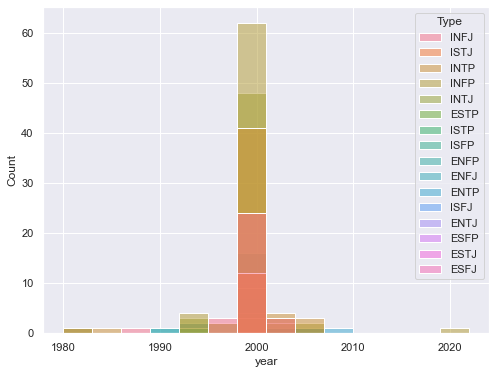

In [20]:
import seaborn as sns

sns.set(rc={'figure.figsize':(8,6)})
sns.histplot(x='year',hue='Type', data=birthday_df,binwidth=3)

In [21]:
birthday_df.year.value_counts()

2000    246
2002     11
1993      5
1998      4
1994      4
2006      3
2001      3
1992      3
2004      3
1996      3
1995      3
1999      3
2003      3
1991      2
1982      2
2005      2
1983      1
2020      1
1988      1
1980      1
1997      1
2007      1
Name: year, dtype: int64

We found that most of them were born in 2000, which may be a long-tail effect of the data set itself and needs to be handled with care later.

<AxesSubplot:xlabel='month', ylabel='Count'>

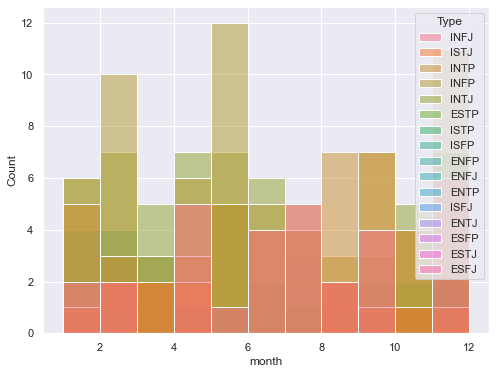

In [22]:
sns.set(rc={'figure.figsize':(8,6)})
sns.histplot(x='month',hue='Type', data=birthday_df,binwidth=1)